# CNN evaluation and predictions

<br>This notebook shows how the CNN models can be used for predicting the centers of the particles with the trained models. 
<br> You can use the modules to extract particle centres and check the quality of the predictions via annotations.
<br> The model use here is fully trained.

Finally there is a code for computing the metrics: accuracy and F1 score.

In [1]:
# load the python modules 
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt 
import torch
from torch import nn
import cv2
from torchvision import transforms
import glob
# import the user defined modules
from utils.cood_htmp_exchange import heatmap2cood 
from utils.config_utils import load_config

# import the models
from models import UNetHeatmap
from utils.visualizations import visualise_detection

In [2]:
# ........... build the path architecture ........ 
cwd = Path().resolve() 
Parent = cwd.parent
# set file path architecture from the yaml file. 
path_data = load_config(str(cwd.parent / 'configs/config.yaml'))
# path to the image stock (... path the data warehouse ......)
stock_image_dir =cwd.parent / path_data['Images']['Unlabelled_stock']
# path to store the predicted heatmap
heatmaps_pred_w_err_dir = cwd.parent / path_data['Heatmaps']['Errored_HumanOL']
# path to store the images used for prediction 
images_pred_w_err_dir = cwd.parent / path_data['Images']['Errored_HumanOL']
# path to the models
model_path =cwd.parent / path_data['Trained_Models']

In [3]:
# Set evaluate the model based on the proccessing unit available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
#model = UNetHeatmap()
model = torch.load( str(model_path) + '\CNN_UNET_full_model.pth')
model.to(device)
_ = model.eval()

In [5]:
stock_image_list = glob.glob(str(stock_image_dir)+'\*')

In [6]:
# extract the x and y coordinates
x_coord, y_coord, heatmap = heatmap2cood(model, stock_image_list[0], device, threshold = 20, scan_radius = 2)

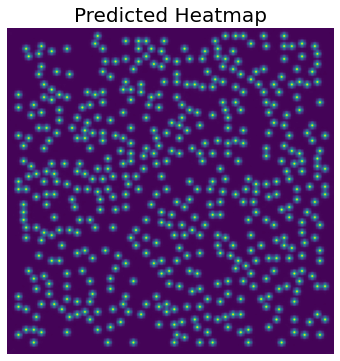

In [13]:
# plot the heatmap obtained from the prediction.
plt.figure(figsize = (6,6))
plt.axis('off')
plt.title('Predicted Heatmap', size = 20)
plt.imshow(heatmap)

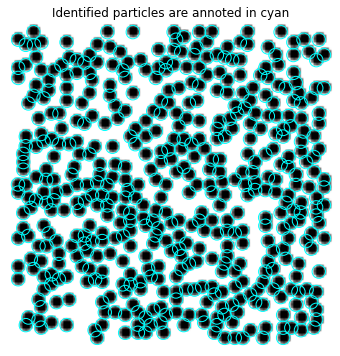

In [8]:
# Now lets annote the image with the detected particles 
visualise_detection(x_coord, y_coord, cv2.imread(stock_image_list[0], cv2.IMREAD_GRAYSCALE),180)

# Metrics for quatifying the quality of detection

In [ ]:
# lets load the ground truth of the image 
